In [15]:
import numpy as np
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt 
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
file_path = r"D:\tfolder\codingFile\AIlearning\soft_max\train.csv"
df = pd.read_csv(file_path)
print(df.shape)
df.head(10)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


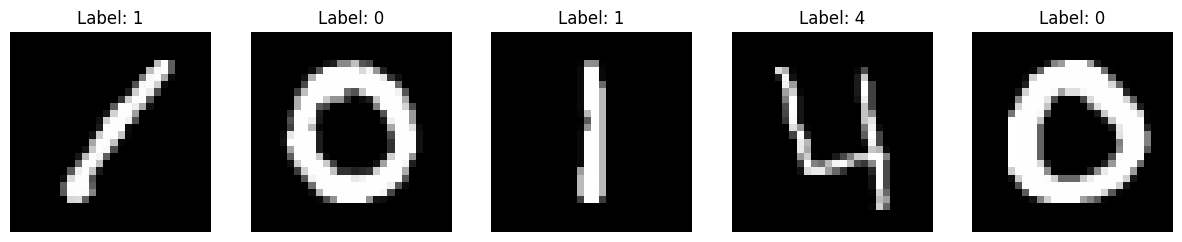

In [7]:
images = df.iloc[:5, 1:].values  # Chọn 5 hàng đầu tiên và bỏ cột nhãn
labels = df.iloc[:5, 0].values  # Lấy nhãn của 5 hình ảnh đầu tiên

# Chuyển đổi dữ liệu thành dạng hình ảnh 28x28
images = images.reshape(-1, 28, 28)

# Vẽ các hình ảnh
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    axes[i].imshow(images[i], cmap='gray')  # Vẽ ảnh với màu xám
    axes[i].set_title(f"Label: {labels[i]}")  # Ghi nhãn của mỗi hình ảnh
    axes[i].axis('off')  # Tắt trục tọa độ

plt.show()

In [19]:
images = torch.tensor(df.iloc[:, 1:].values, dtype=torch.float32).to(device)
labels = torch.tensor(df.iloc[:, 0].values, dtype=torch.long).to(device)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = .2, random_state = 42)
X_train = (X_train/255).to(device)
X_test = (X_test/255).to(device)
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False)


In [9]:
print(X_train.shape, X_test.shape)

torch.Size([33600, 784]) torch.Size([8400, 784])


In [17]:
class mnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.2)
        self.layer2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.2)
        self.layer3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.bn1(self.layer1(x))
        x = torch.relu(x)
        x = self.dropout1(x)
        x = self.bn2(self.layer2(x))
        x = torch.relu(x)
        x = self.dropout2(x)
        x = self.layer3(x)
        return x

model = mnistModel().to(device)

print(model.state_dict())

OrderedDict({'layer1.weight': tensor([[ 0.0029, -0.0208,  0.0315,  ...,  0.0039, -0.0050, -0.0214],
        [-0.0100,  0.0245,  0.0182,  ...,  0.0235,  0.0221,  0.0084],
        [-0.0276,  0.0115, -0.0214,  ..., -0.0018,  0.0083, -0.0151],
        ...,
        [ 0.0336, -0.0311, -0.0254,  ..., -0.0189,  0.0213, -0.0264],
        [-0.0050, -0.0281, -0.0120,  ...,  0.0316, -0.0075, -0.0108],
        [-0.0223,  0.0187, -0.0151,  ..., -0.0034, -0.0270, -0.0274]]), 'layer1.bias': tensor([ 4.7751e-03,  9.3870e-03,  2.6798e-02, -9.1928e-03, -1.2428e-02,
         1.4247e-02, -1.4720e-02, -3.4685e-02, -1.2038e-02, -2.3835e-03,
         2.6994e-02, -1.1362e-02, -3.2536e-02, -2.8360e-02, -1.4660e-02,
        -6.0950e-03,  1.9115e-02,  5.1171e-03,  2.9208e-03, -3.8466e-03,
         2.1179e-02,  2.2247e-02, -1.8837e-02,  1.6312e-02, -1.9745e-02,
         6.0725e-03, -7.8824e-03, -2.1798e-02, -2.4602e-03, -2.2217e-02,
         3.6394e-03, -1.4891e-02, -2.9027e-02,  3.1759e-02,  1.6610e-02,
        -

In [20]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
from tqdm import tqdm
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0 
    correct = 0
    total_preds = 0
    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}', unit='batch') as t:
        for X, y in t :
            X = X.to(device)
            y = y.to(device)
            logit = model(X)
            loss = loss_func(logit, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(logit, 1)
            correct += (predicted == y).sum().item()
            total_preds += y.size(0)
            
            # Cập nhật description của tqdm
            t.set_postfix(loss=running_loss / (t.n + 1), accuracy=correct / total_preds)

    # In kết quả sau mỗi epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total_preds
    print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
    


Epoch 1/10: 100%|██████████| 3360/3360 [00:34<00:00, 98.50batch/s, accuracy=0.88, loss=0.386]  


Epoch 1/10 - Loss: 0.3856, Accuracy: 0.8804


Epoch 2/10: 100%|██████████| 3360/3360 [00:32<00:00, 102.97batch/s, accuracy=0.926, loss=0.242]


Epoch 2/10 - Loss: 0.2411, Accuracy: 0.9256


Epoch 3/10: 100%|██████████| 3360/3360 [00:32<00:00, 103.96batch/s, accuracy=0.938, loss=0.2]  


Epoch 3/10 - Loss: 0.1995, Accuracy: 0.9378


Epoch 4/10: 100%|██████████| 3360/3360 [00:35<00:00, 95.56batch/s, accuracy=0.946, loss=0.178] 


Epoch 4/10 - Loss: 0.1776, Accuracy: 0.9457


Epoch 5/10: 100%|██████████| 3360/3360 [00:37<00:00, 89.01batch/s, accuracy=0.952, loss=0.156] 


Epoch 5/10 - Loss: 0.1550, Accuracy: 0.9521


Epoch 6/10: 100%|██████████| 3360/3360 [00:28<00:00, 117.95batch/s, accuracy=0.955, loss=0.143]


Epoch 6/10 - Loss: 0.1428, Accuracy: 0.9551


Epoch 7/10: 100%|██████████| 3360/3360 [00:30<00:00, 109.50batch/s, accuracy=0.958, loss=0.135]


Epoch 7/10 - Loss: 0.1342, Accuracy: 0.9576


Epoch 8/10: 100%|██████████| 3360/3360 [00:32<00:00, 102.32batch/s, accuracy=0.962, loss=0.122]


Epoch 8/10 - Loss: 0.1216, Accuracy: 0.9620


Epoch 9/10: 100%|██████████| 3360/3360 [00:34<00:00, 96.57batch/s, accuracy=0.964, loss=0.115] 


Epoch 9/10 - Loss: 0.1147, Accuracy: 0.9642


Epoch 10/10: 100%|██████████| 3360/3360 [00:32<00:00, 102.36batch/s, accuracy=0.966, loss=0.107]

Epoch 10/10 - Loss: 0.1070, Accuracy: 0.9661


In [23]:
model.eval()  # Chuyển mô hình sang chế độ evaluation (không cập nhật trọng số)
val_loss = 0.0
correct_val = 0
total_val_preds = 0

with torch.no_grad():  # Tắt tính toán gradient
    with tqdm(test_loader, desc=f'Epoch {epoch+1}/{epochs} (Validation)', unit='batch') as t:
        for X_val, y_val in t:
            X_val = X_val.to(device)
            y_val = y_val.to(device)

            # Tính toán output từ mô hình
            logit_val = model(X_val)

            # Tính toán loss trên tập validation
            loss_val = loss_func(logit_val, y_val)
            val_loss += loss_val.item()

            # Dự đoán lớp với giá trị logit cao nhất
            _, predicted_val = torch.max(logit_val, 1)
            correct_val += (predicted_val == y_val).sum().item()
            total_val_preds += y_val.size(0)

            # Cập nhật thông tin trong tqdm
            t.set_postfix(val_loss=val_loss / (t.n + 1), val_accuracy=correct_val / total_val_preds)

# Tính toán kết quả trên tập validation sau mỗi epoch
val_epoch_loss = val_loss / len(test_loader)
val_epoch_accuracy = correct_val / total_val_preds
print(f"Epoch {epoch+1}/{epochs} - Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_accuracy:.4f}")

Epoch 10/10 (Validation): 100%|██████████| 840/840 [00:02<00:00, 302.36batch/s, val_accuracy=0.979, val_loss=0.0702]

Epoch 10/10 - Validation Loss: 0.0679, Validation Accuracy: 0.9793
